# Summary Statistics

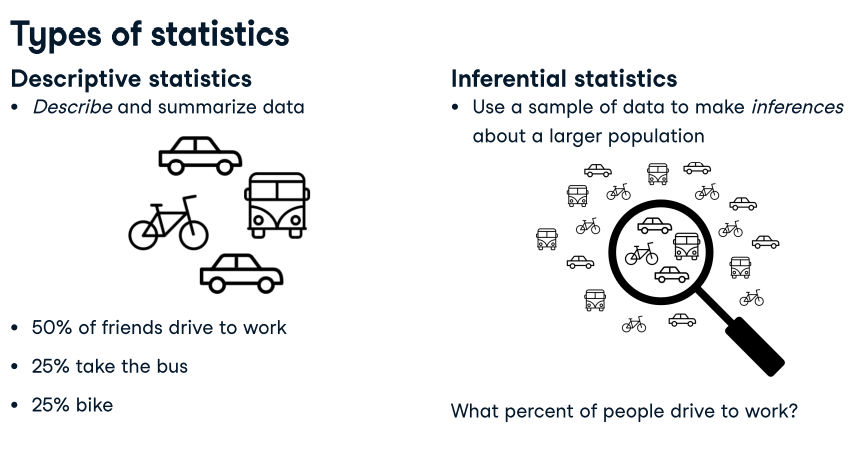

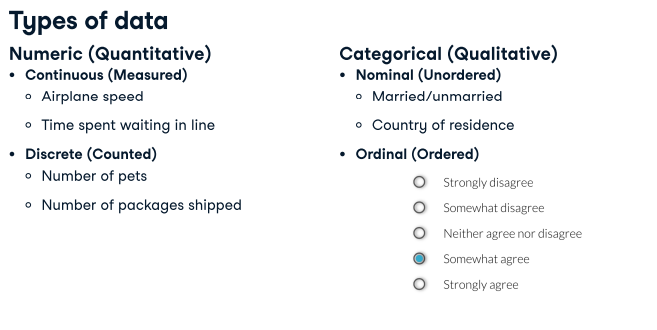

## Measures of center

In [1]:
import pandas as pd
food_consumption = pd.read_csv('data/food_consumption.csv')
food_consumption.head()

Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96

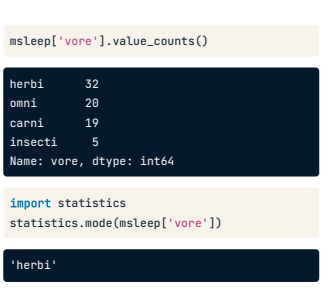

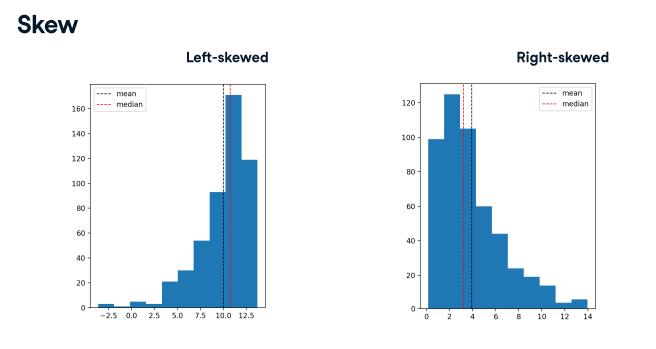

In [2]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(be_consumption.mean())
print(be_consumption.median())

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median())

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64


C:\Users\ultra\AppData\Local\Temp\ipykernel_32\2002722194.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.mean())
C:\Users\ultra\AppData\Local\Temp\ipykernel_32\2002722194.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.median())
C:\Users\ultra\AppData\Local\Temp\ipykernel_32\2002722194.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(usa_consumption.mean())
C:\Users\ultra\AppData\Local\Temp\ipykernel_32\2002722194.py:16: Fu

In [3]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


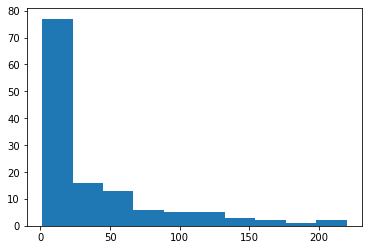

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [4]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean,np.median]))

## Measures of spread

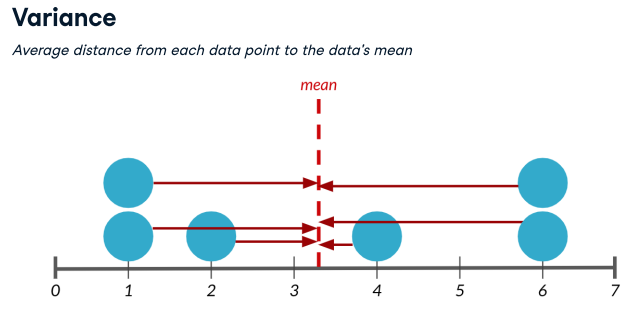

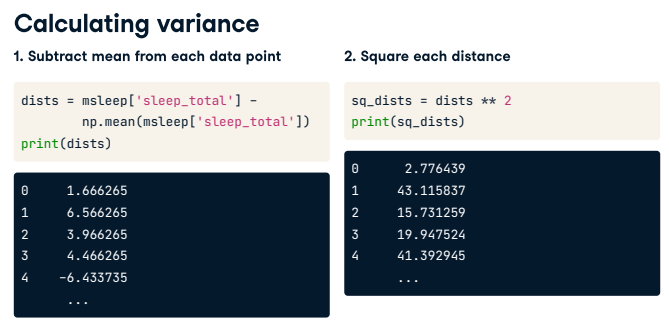

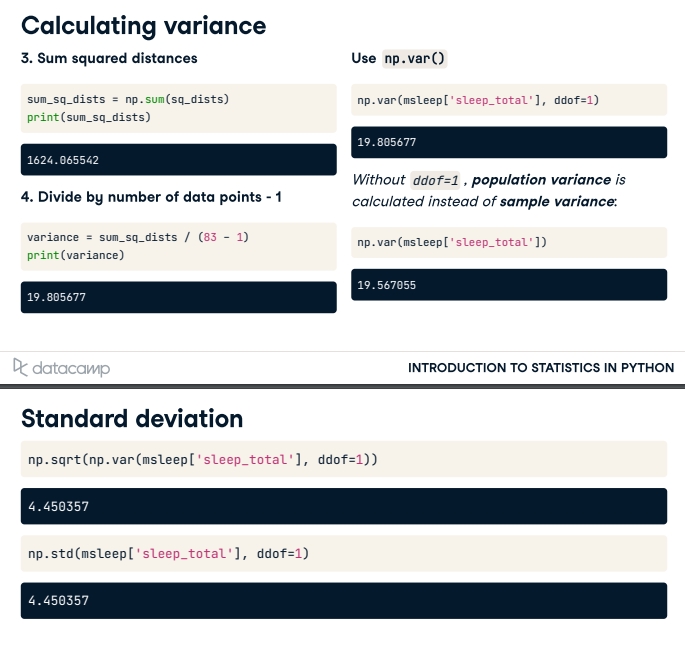

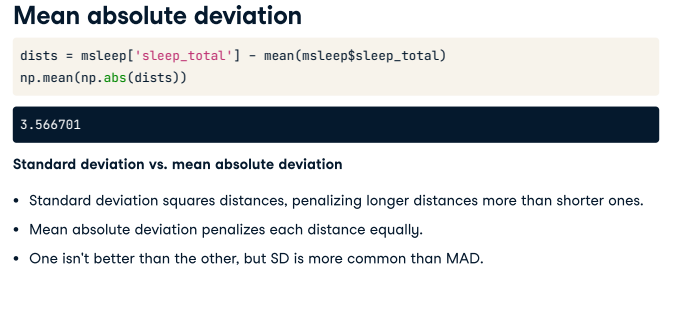

In [5]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,5)))

# Calculate the quintiles of co2_emission
print(print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,6))))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
None


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


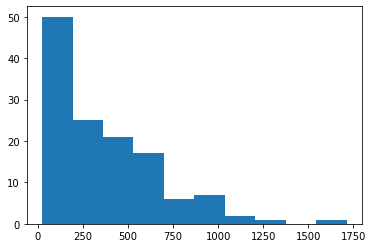

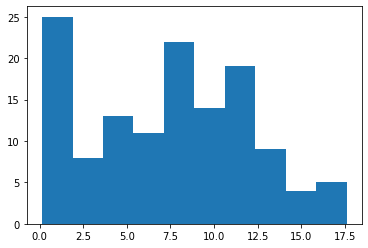

In [6]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var,np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()
plt.clf()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.show()

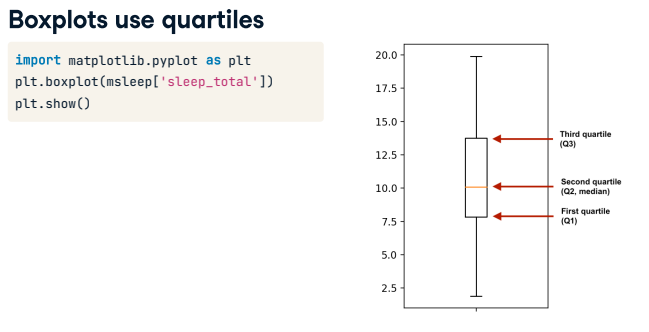

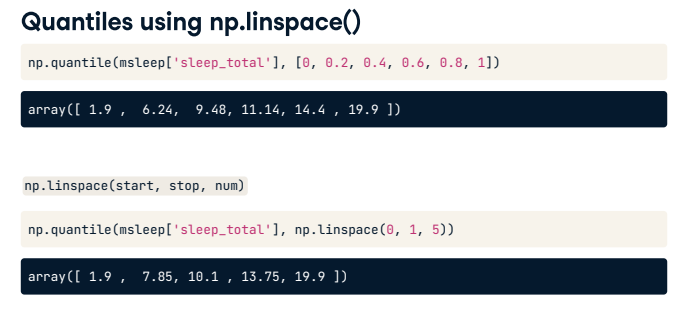

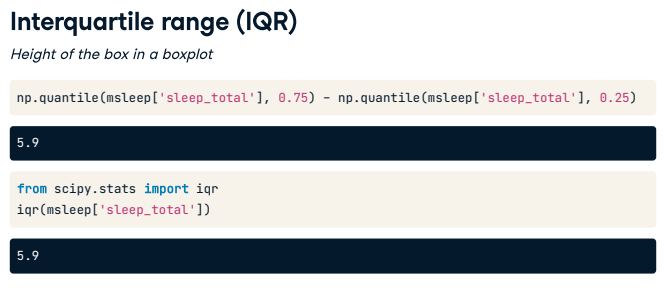

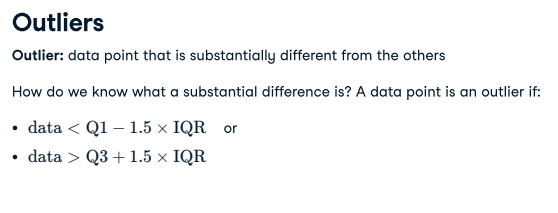

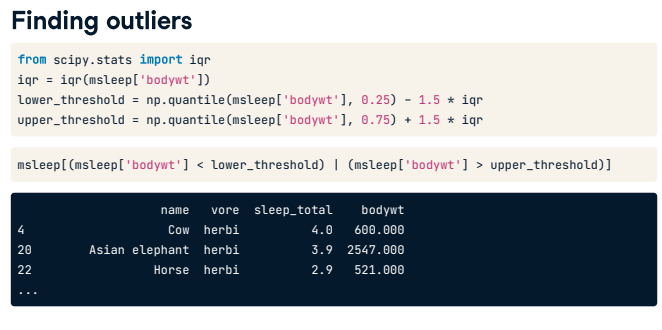

country
Argentina    2172.4
Name: co2_emission, dtype: float64


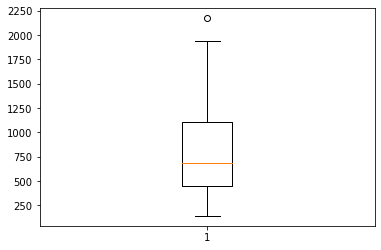

In [7]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)
import matplotlib.pyplot as plt
plt.boxplot(emissions_by_country)
plt.show()

# Random Numbers and Probability

## What are the chances?

In [8]:
amir_deals = pd.read_csv('data/amir_deals.csv')
amir_deals.head()

Unnamed: 0    product   client status   amount  num_users
0           1  Product F  Current    Won  7389.52         19
1           2  Product C      New    Won  4493.01         43
2           3  Product B      New    Won  5738.09         87
3           4  Product I  Current    Won  2591.24         83
4           5  Product E  Current    Won  6622.97         17

In [9]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [10]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [11]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5 , replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


## Discrete distributions

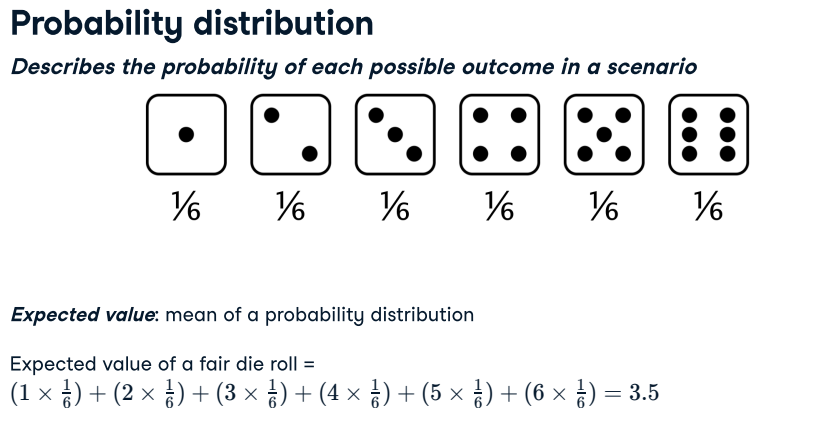

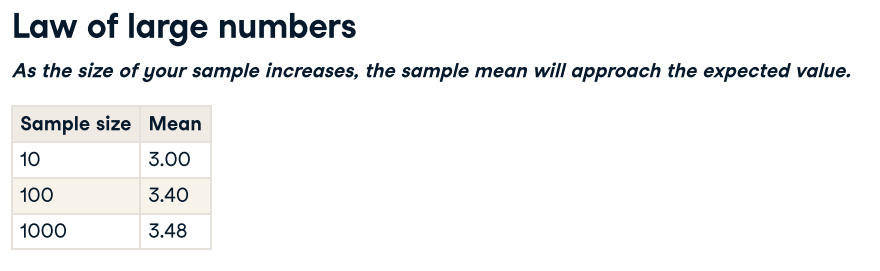

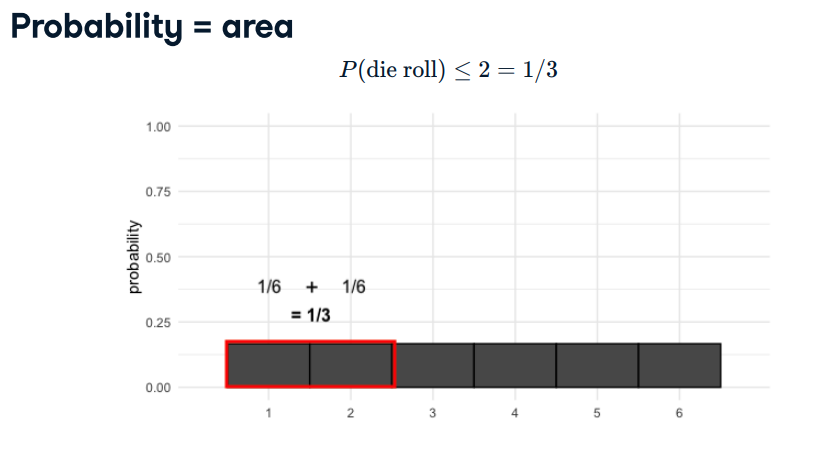

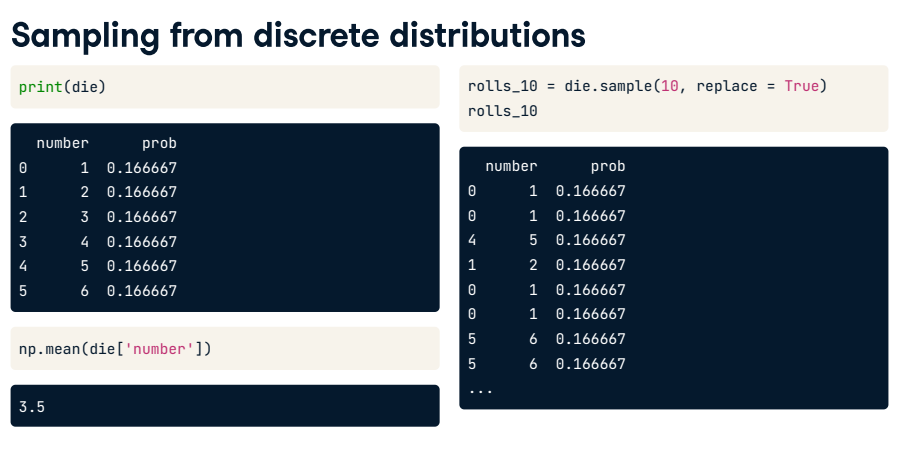

In [12]:
groups = {'group_id':['A','B','C','D','E','F','G','H','I','J'],
                    'group_size':[2,4,6,2,2,2,3,2,4,2]}
restaurant_groups = pd.DataFrame(groups)

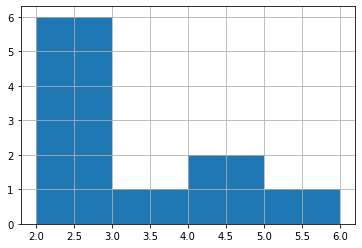

In [13]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins = [2,3,4,5,6])
plt.show()

In [14]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']
print(size_dist)

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
2.9000000000000004
0.30000000000000004


## Continuous distributions

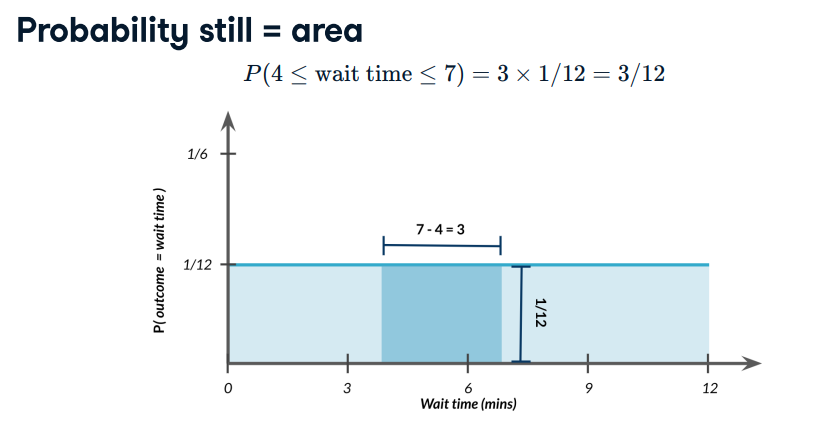

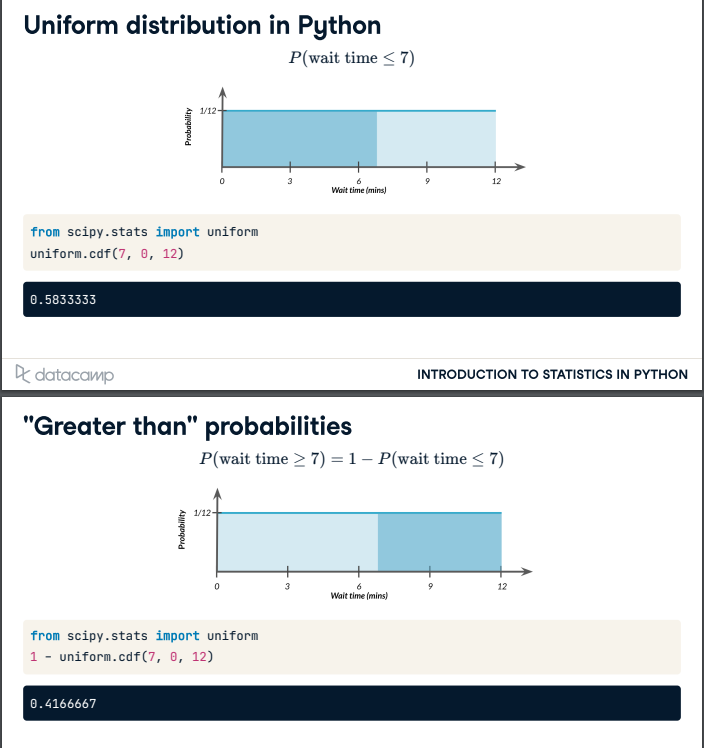

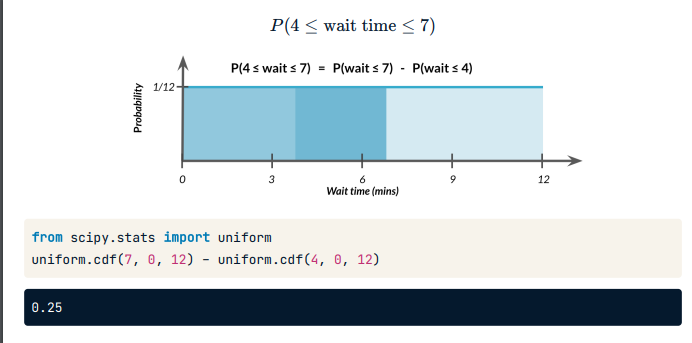

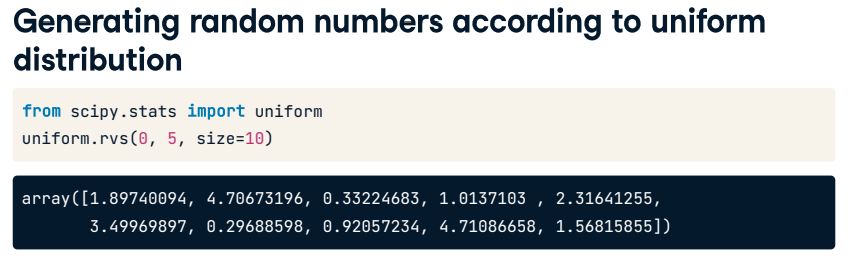

In [15]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,0,30)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30) - uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


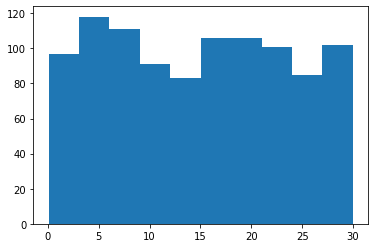

In [16]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

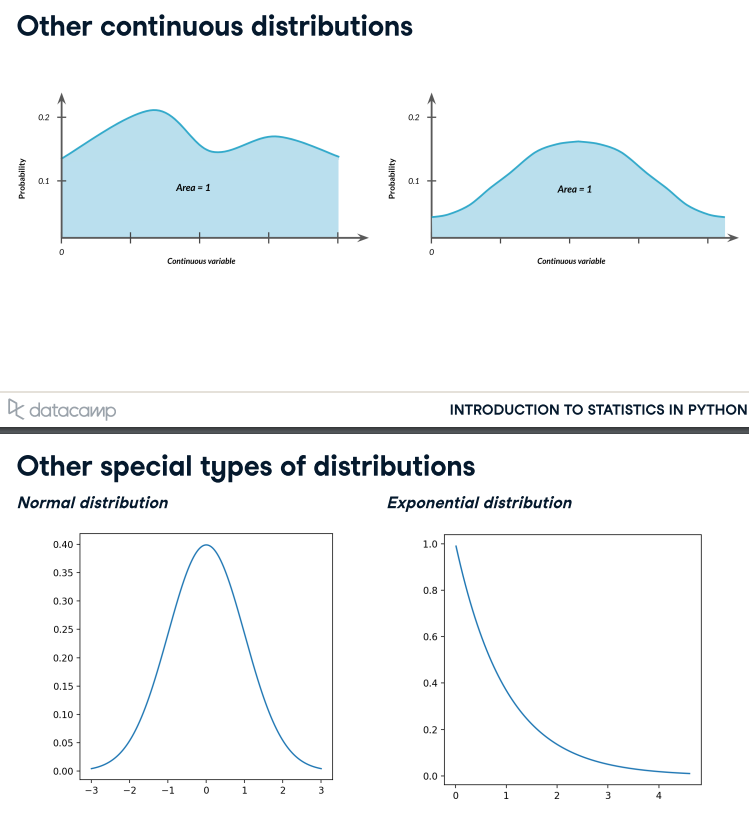

## The binomial distribution (Discrete)

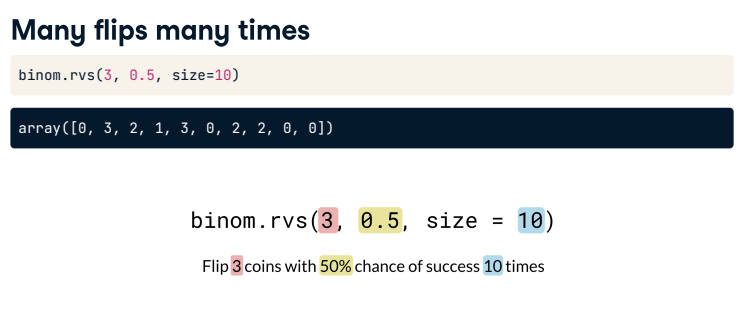

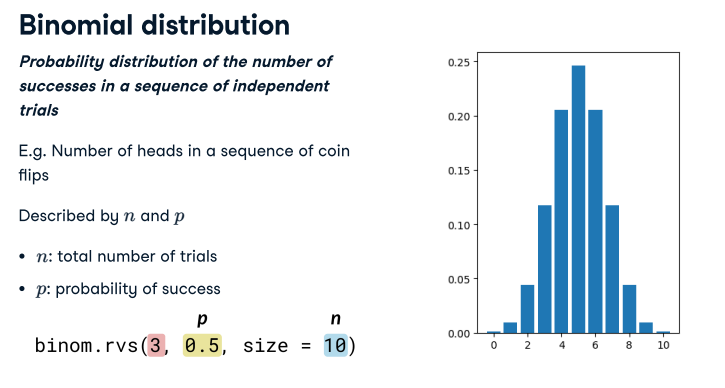

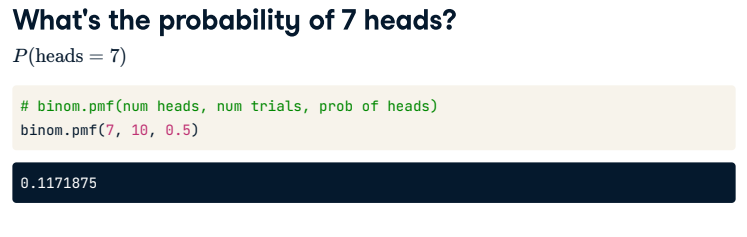

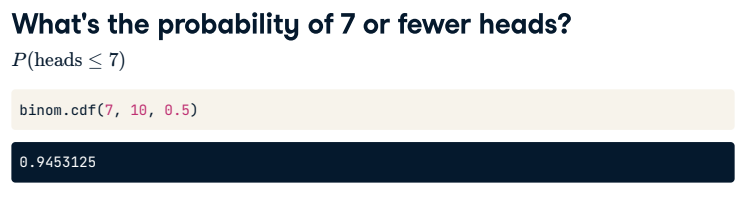

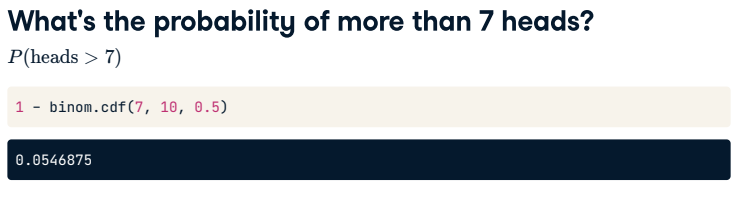

In [17]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.30, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8269230769230769


In [18]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)

print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


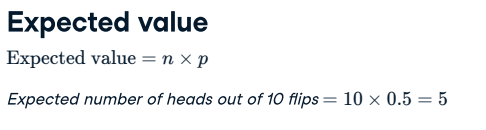

In [19]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.30
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


# More Distributions and the Central Limit Theorem

## The normal distribution

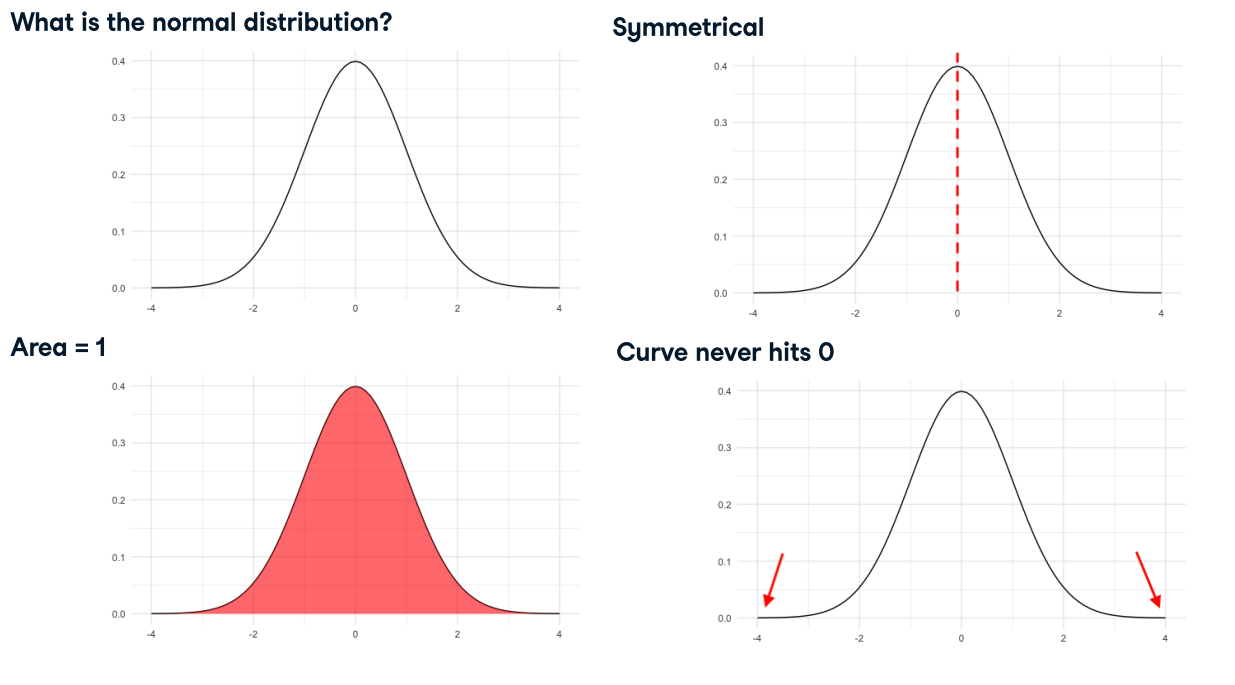

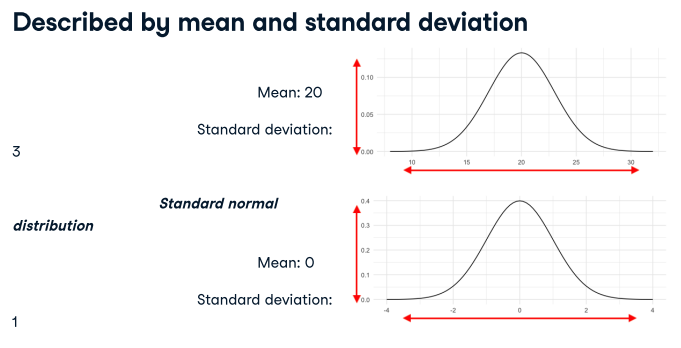

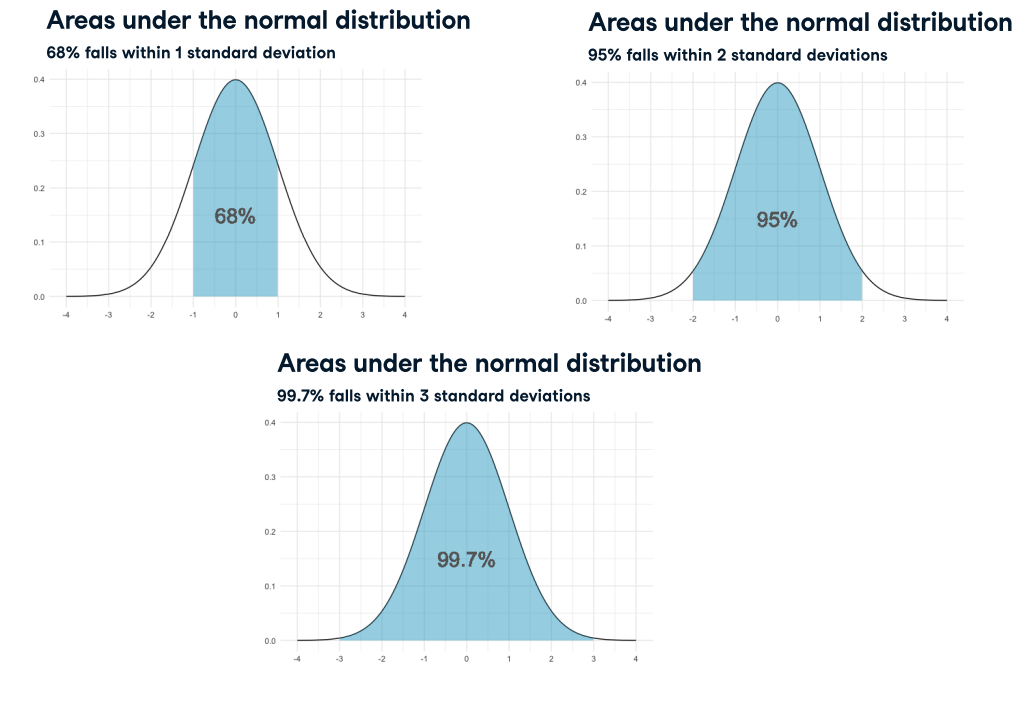

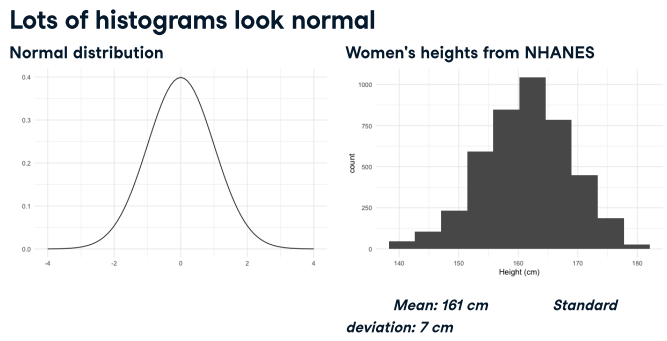

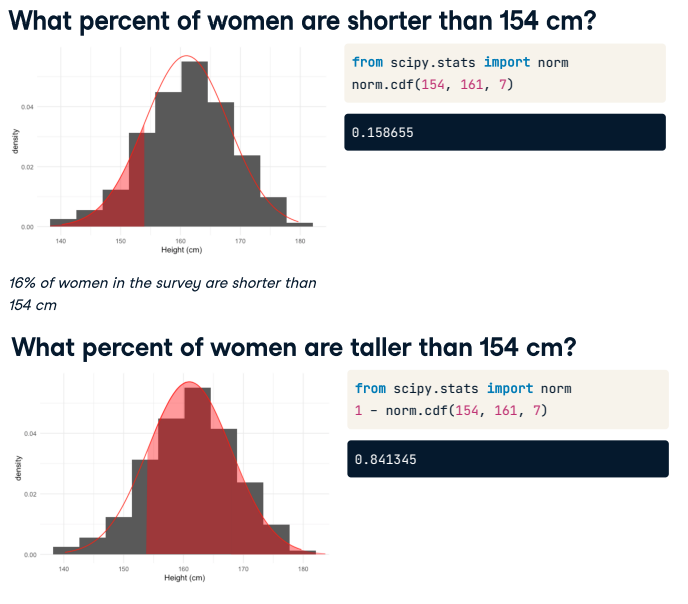

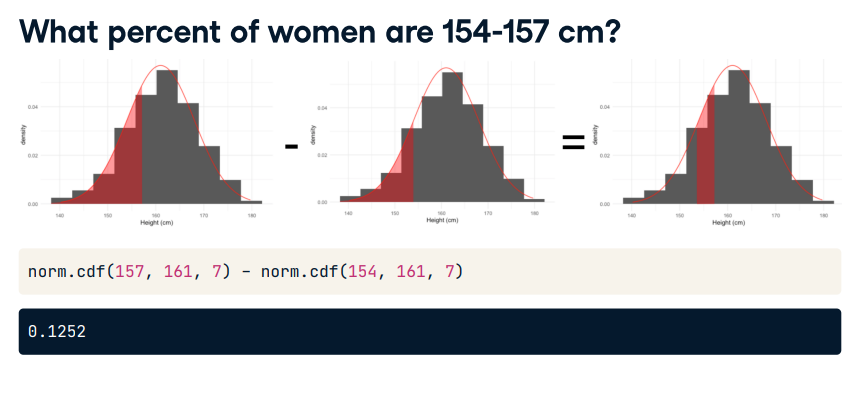

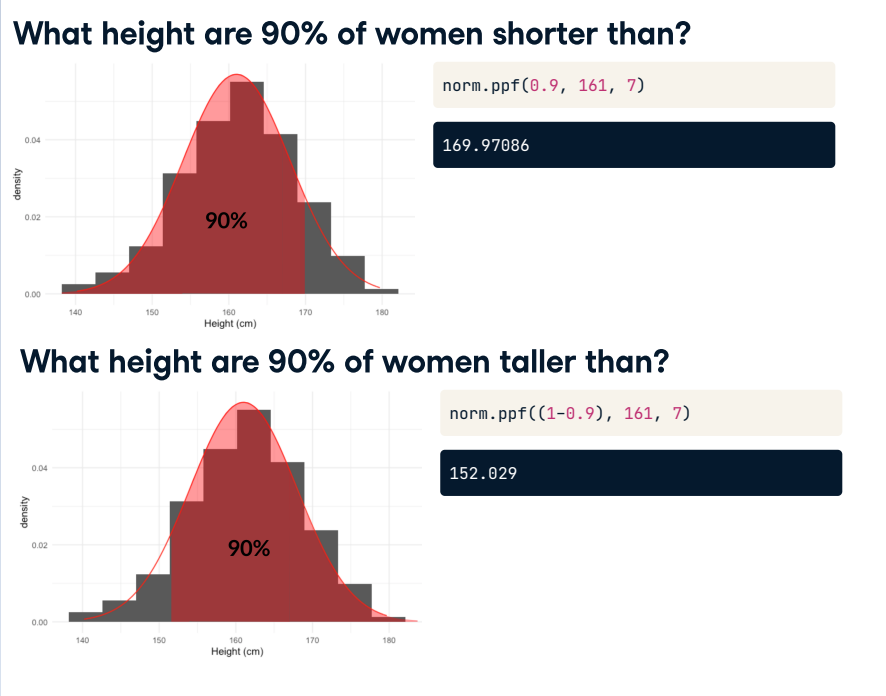

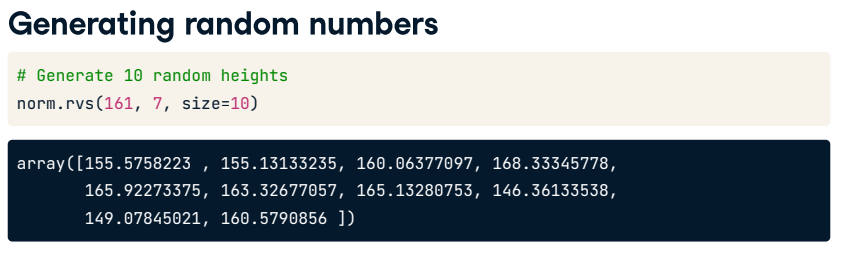

In [20]:
from scipy.stats import norm
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


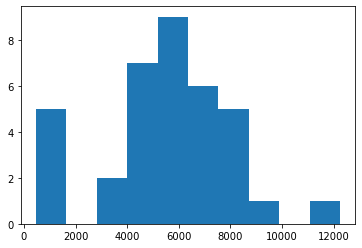

In [22]:
# Calculate new average amount(%20 - 5000$)
new_mean = 5000 * 1.2

# Calculate new standard deviation (%30 - 2000$)
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size = 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

In [24]:
a = 1 - norm.cdf(1000, 5000, 2000)
print("Make Over 1000$ a:",a)

b = 1 - norm.cdf(1000, 6000, 2600)
print("Make Over 1000$ b:",b)

Make Over 1000$ a: 0.9772498680518208
Make Over 1000$ b: 0.9727648049862613


## The central limit theorem

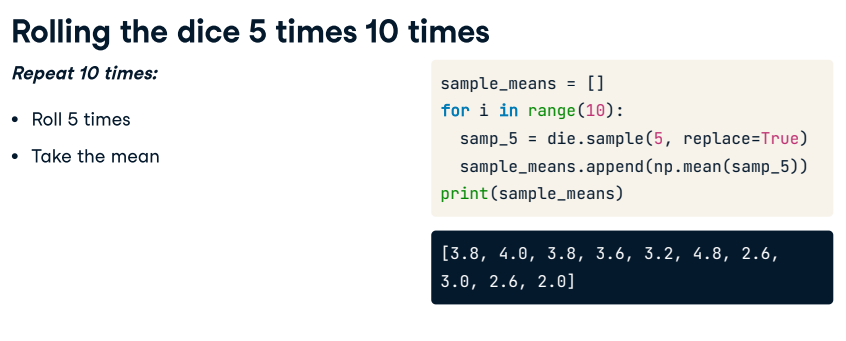

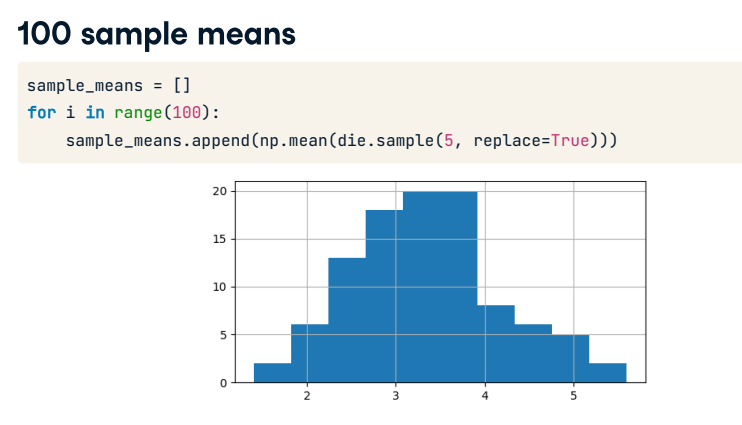

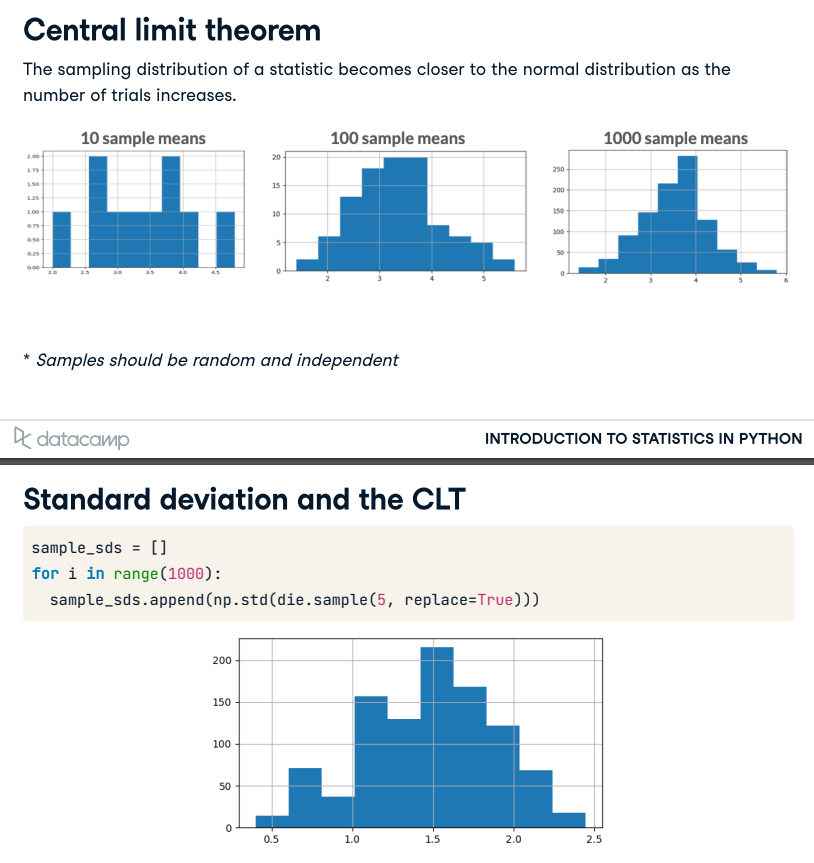

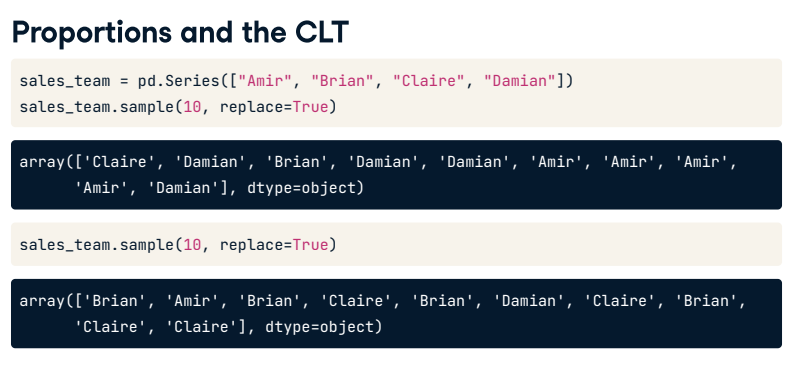

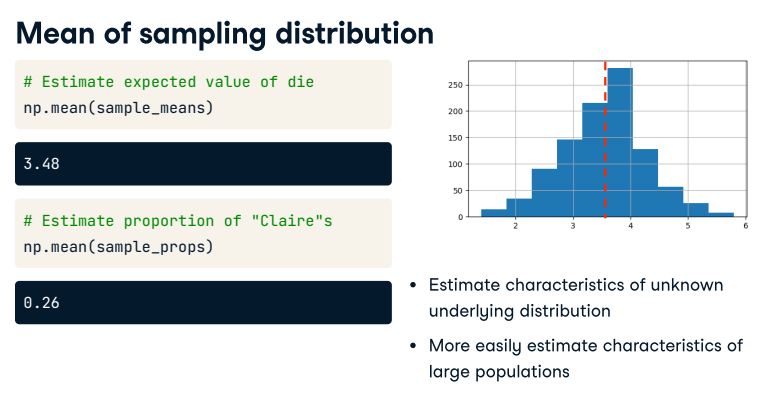

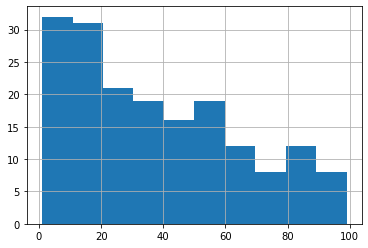

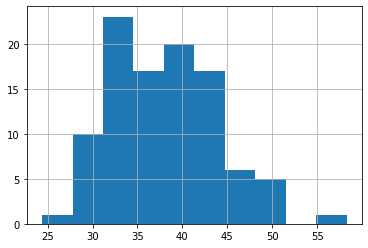

In [26]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)

#Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

## The Poisson distribution

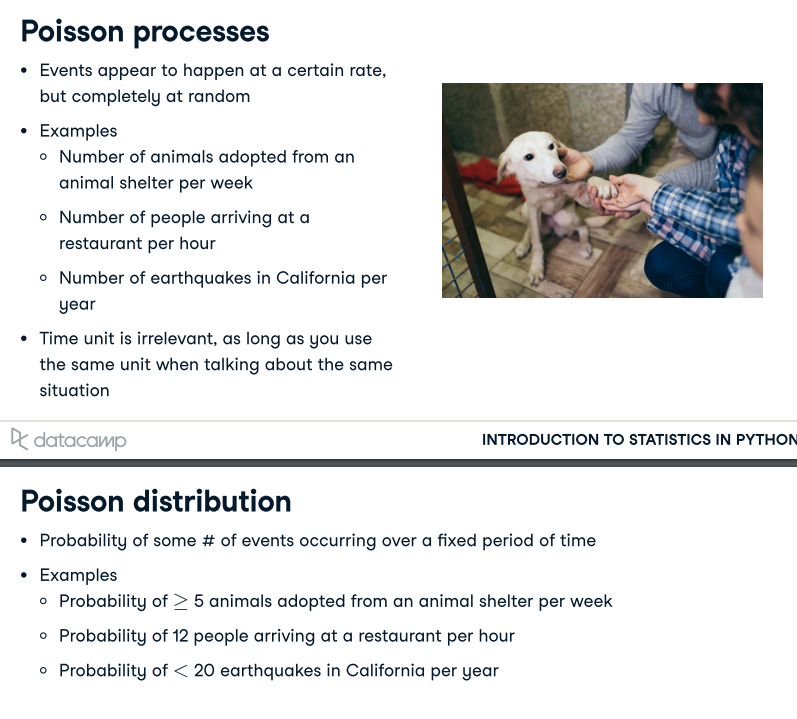

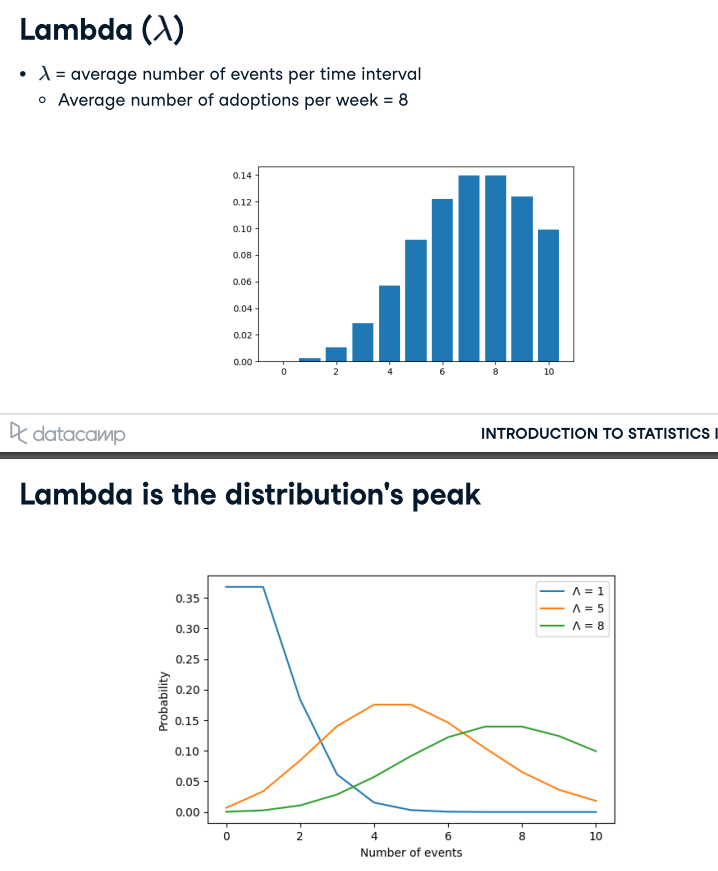

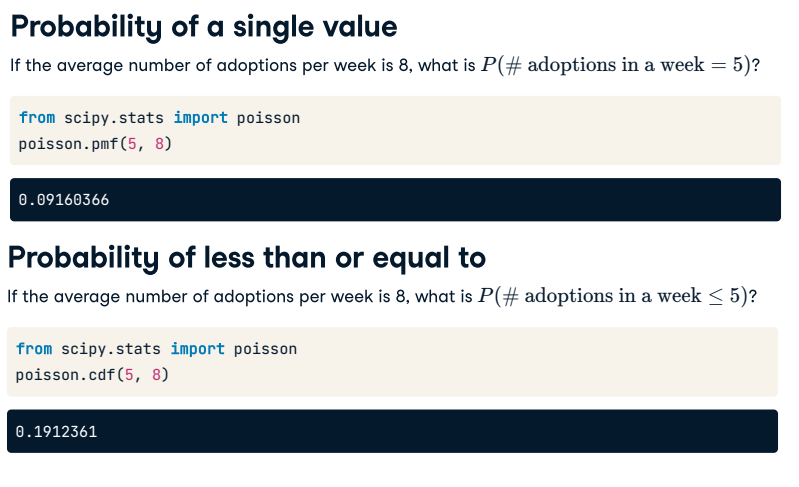

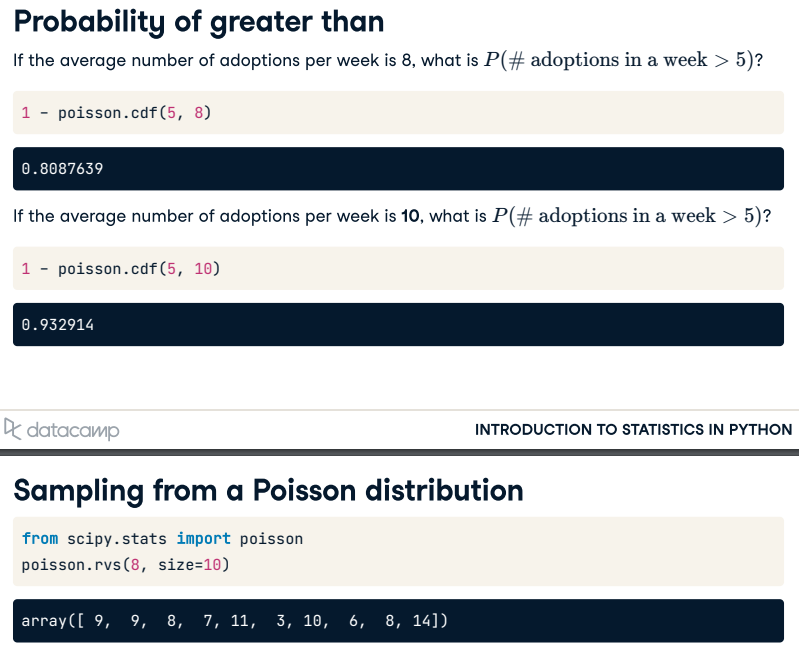

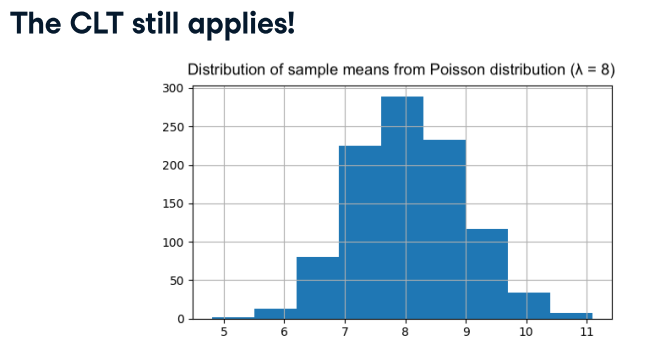

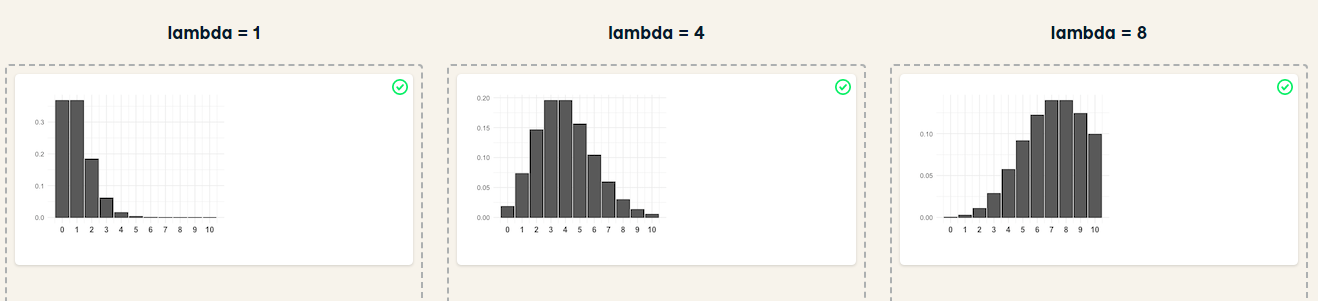

In [27]:
# Import poisson from scipy.stats
from scipy.stats import poisson 

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.1562934518505317
0.23810330555354436
0.0028397661205137315


## More probability distributions

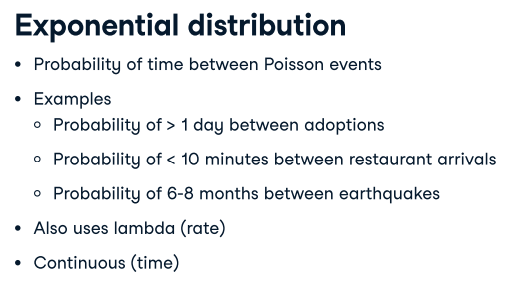

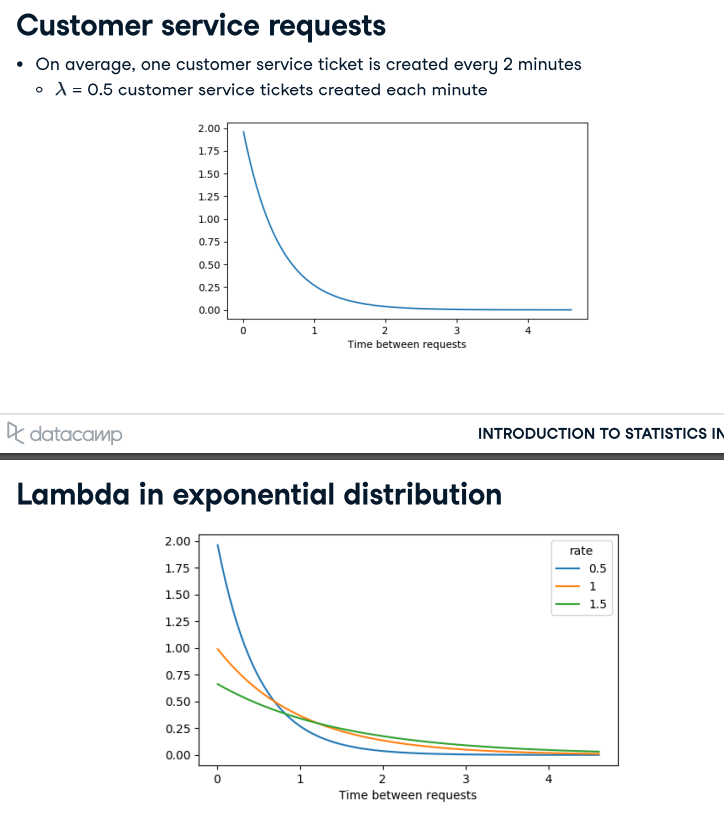

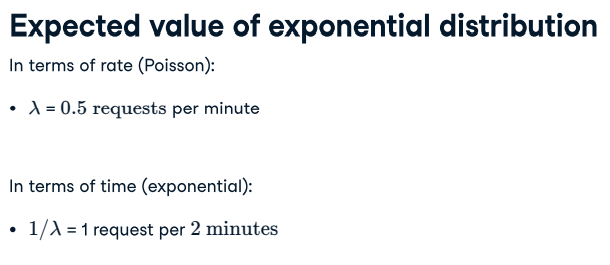

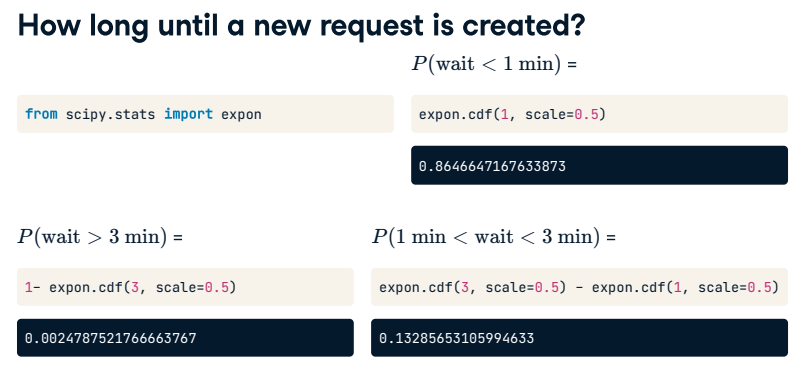

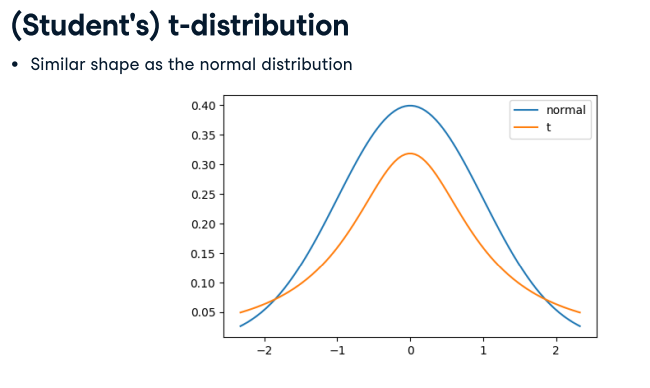

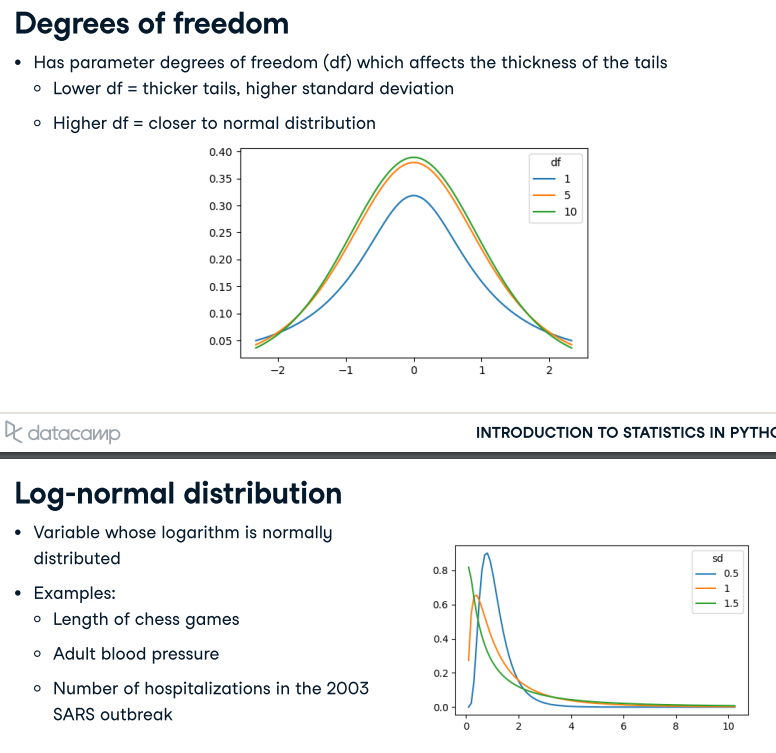

In [28]:
# Import expon from scipy.stats
from scipy.stats import expon 

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale = 2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale = 2.5) - expon.cdf(3, scale = 2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


# Correlation

## Correlation

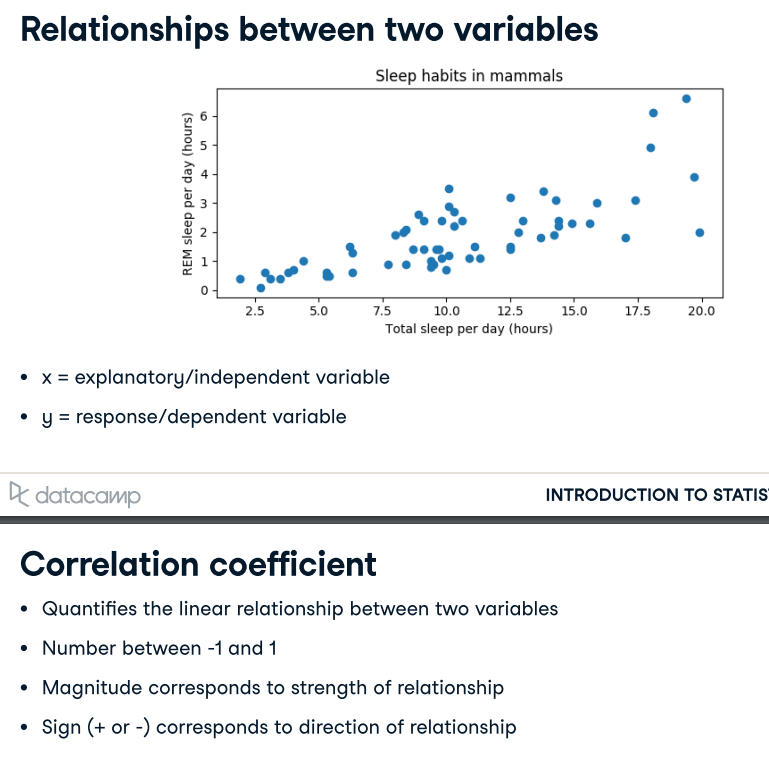

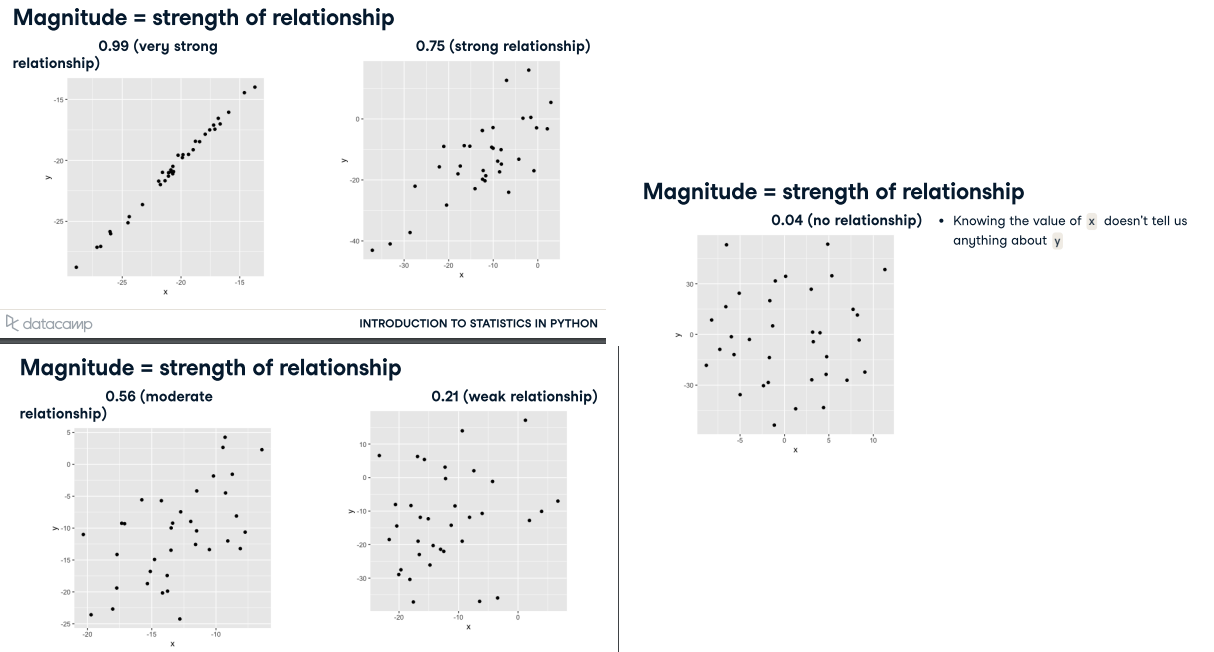

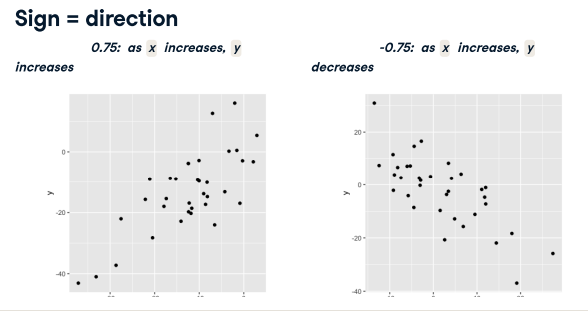

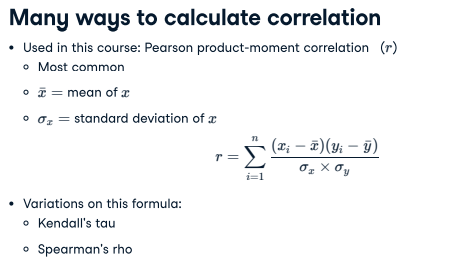

In [30]:
import pandas as pd
world_happiness = pd.read_csv('data/world_happiness.csv')

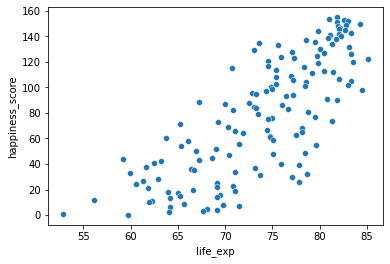

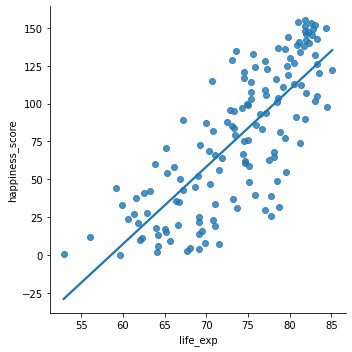

0.7802249053272062


In [31]:
import seaborn as sns
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x = 'life_exp',y = 'happiness_score', data = world_happiness)

# Show plot
plt.show()

# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x = 'life_exp', y = 'happiness_score', data = world_happiness, ci = None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

## Correlation caveats

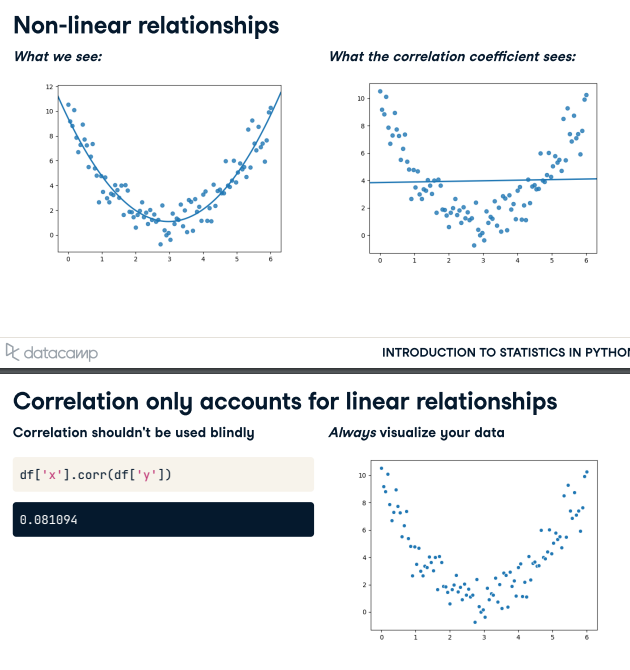

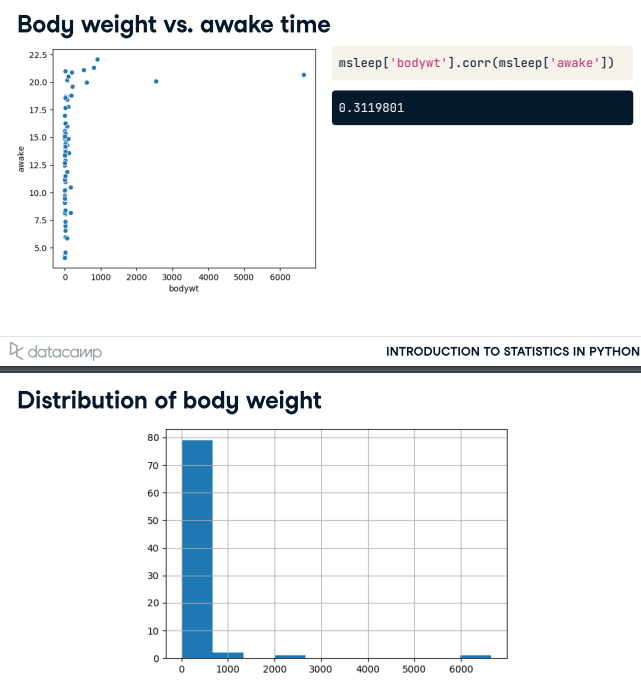

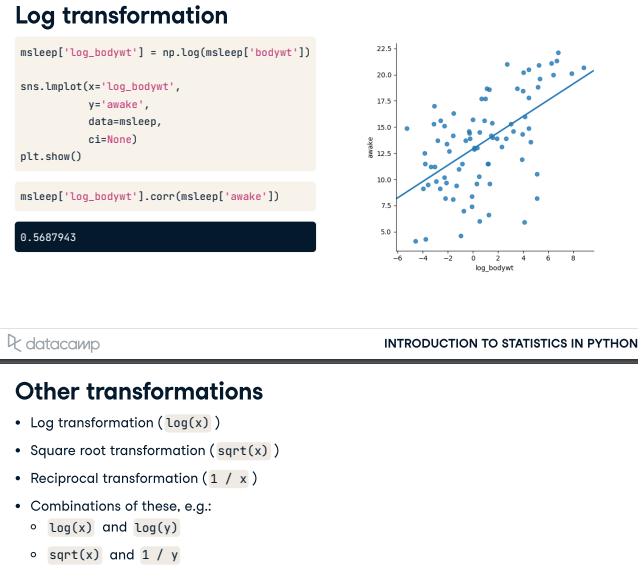

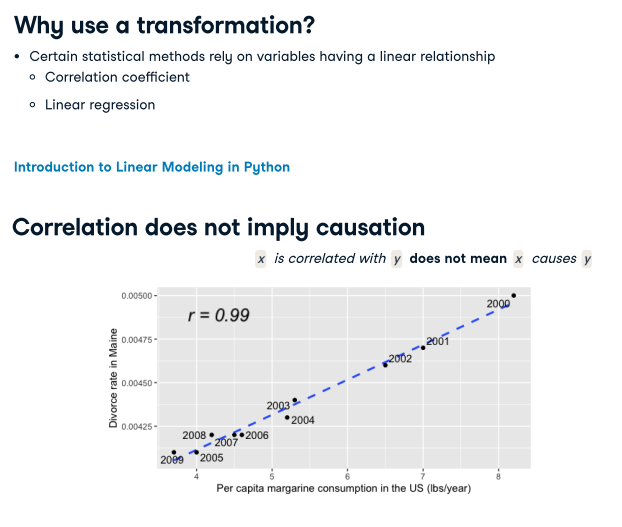

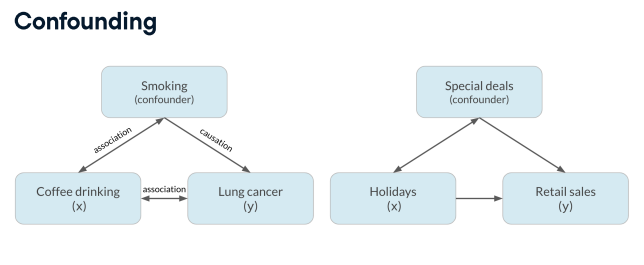

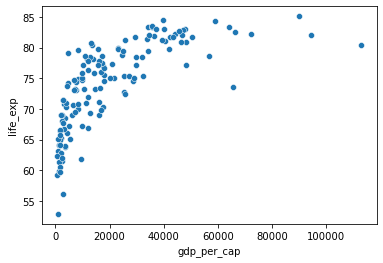

0.7019547642148012


In [32]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

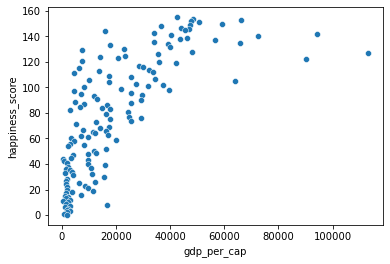

0.727973301222298


In [33]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x = 'gdp_per_cap', y = 'happiness_score', data = world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['happiness_score'].corr(world_happiness['gdp_per_cap'])
print(cor)

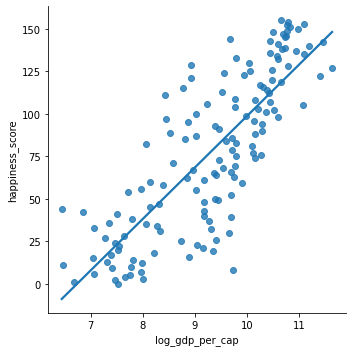

0.8043146004918288


In [35]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.lmplot(x = 'log_gdp_per_cap', y = 'happiness_score', data = world_happiness, ci = None)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

## Design of experiments

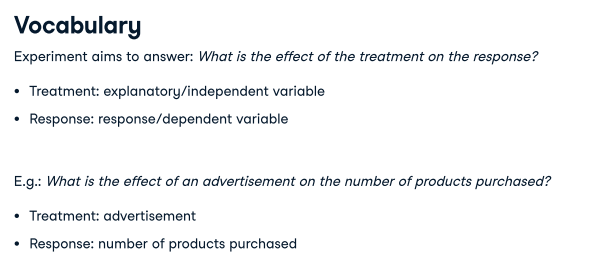

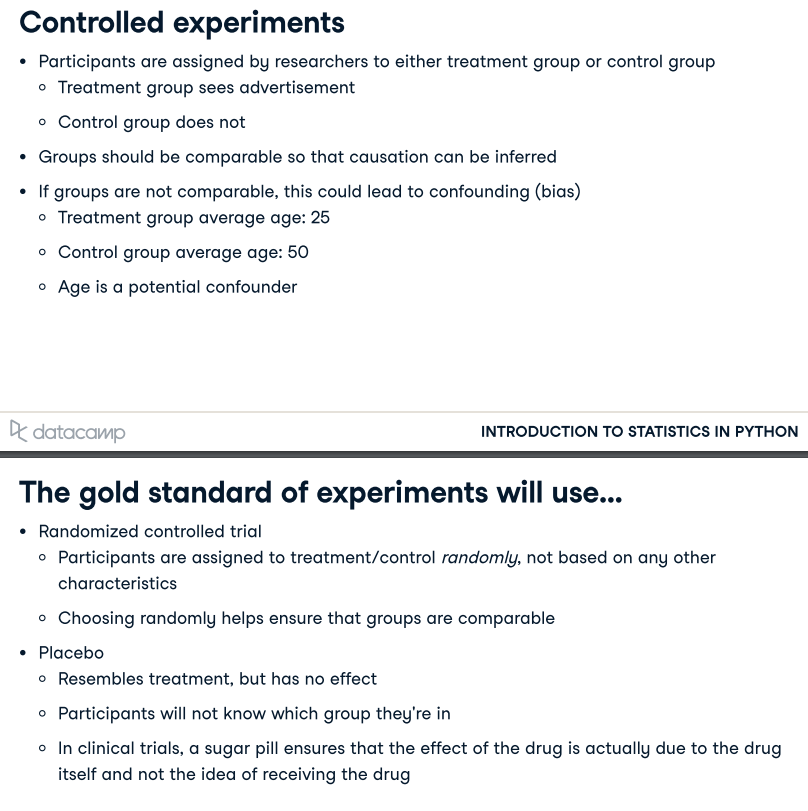

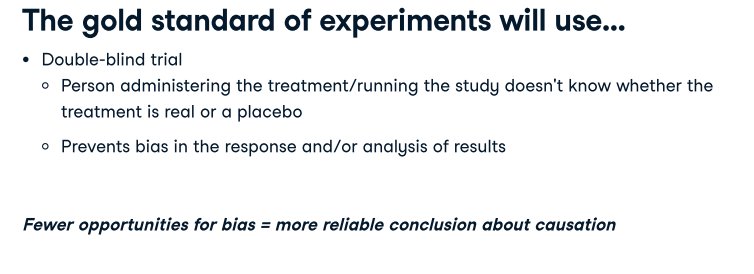

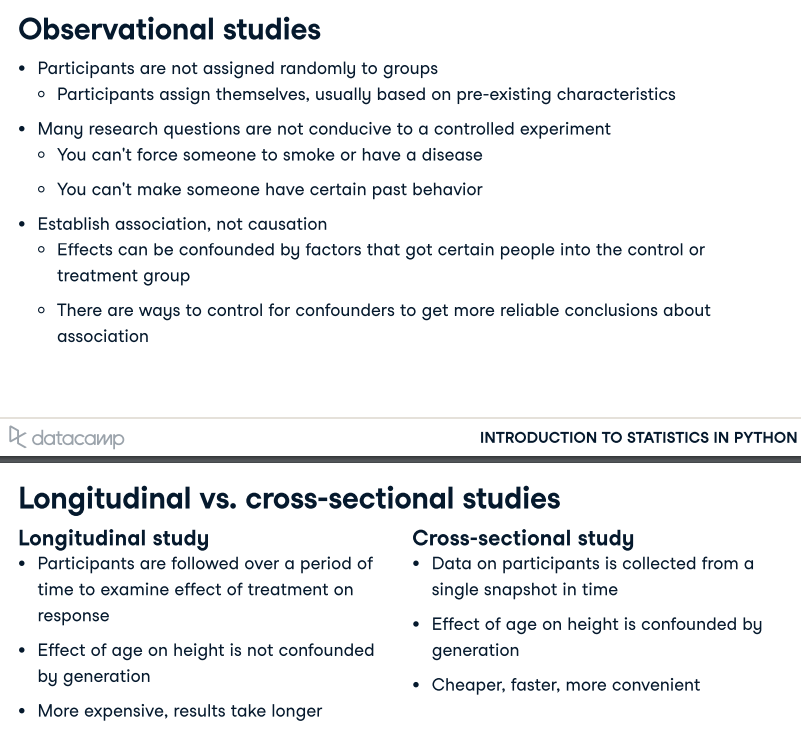

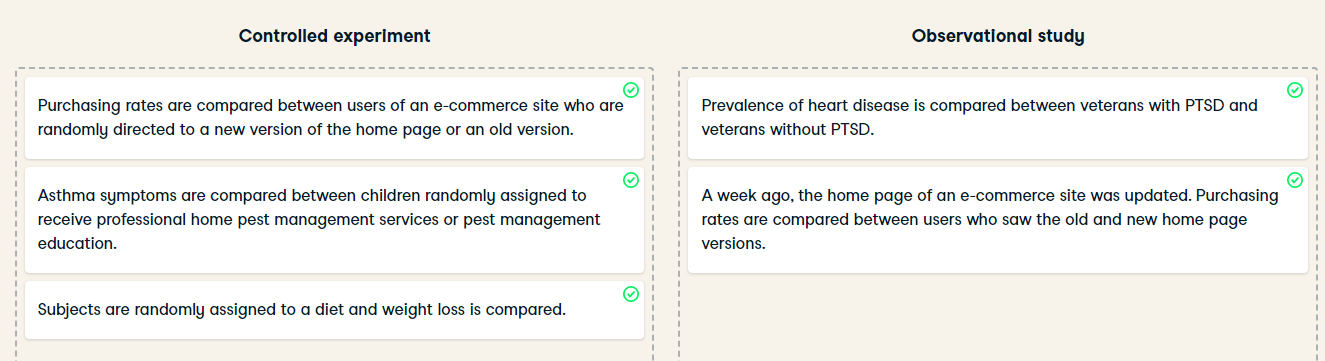